<a href="https://colab.research.google.com/github/eliha96/python_data_analysis/blob/main/countries_of_the_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats


Loading dataset - see https://www.kaggle.com/datasets/fernandol/countries-of-the-world

In [2]:
data = pd.read_csv('countries of the world.csv')

**First - some general statistics about different regions in the world:**
1. What's the total worlds population?
2. How does it spread across the world?
3. How does the wealth spread across the world?

Text(0, 0.5, 'Population (billion)')

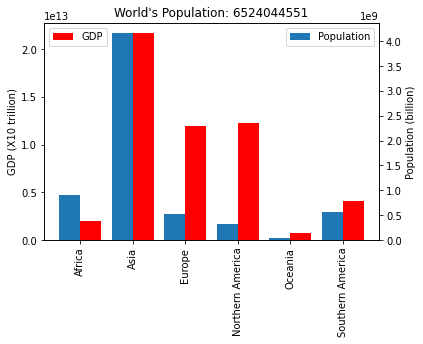

In [118]:
tot_pop = data['Population'].sum() # total world's population

# Converting regions into continents
data['Region'].unique() # showing unique values

# Casting the values into the corresponding continent
asia = ['ASIA (EX. NEAR EAST)         ','C.W. OF IND. STATES ','NEAR EAST                          ']
europe = ['EASTERN EUROPE                     ','WESTERN EUROPE                     ','BALTICS                            ']
oceania = ['OCEANIA                            ']
north_america = ['NORTHERN AMERICA                   ']
sounth_america = ['LATIN AMER. & CARIB    ']
africa = ['NORTHERN AFRICA                    ','SUB-SAHARAN AFRICA                 ']

# Creating a cloned database with continental information
data_cont = data
for i in range(len(data_cont['Region'])):
  if data_cont['Region'].loc[i] in asia:
    data_cont['Region'].loc[i] = 'Asia'
  elif data_cont['Region'].loc[i] in europe:
    data_cont['Region'].loc[i] = 'Europe'
  elif data_cont['Region'].loc[i] in  oceania:
    data_cont['Region'].loc[i] = 'Oceania'
  elif data_cont['Region'].loc[i] in north_america:
    data_cont['Region'].loc[i] = 'Northern America'
  elif data_cont['Region'].loc[i] in sounth_america:
     data_cont['Region'].loc[i] = 'Southern America'
  elif data_cont['Region'].loc[i] in africa:
      data_cont['Region'].loc[i] = 'Africa';

# Calculating each country's GDP by multiplying its 'GDP per capita' by population:
GDP = data['GDP ($ per capita)'].values
population = data['Population'].values
tot_GDP = GDP*population
data['GDP'] = tot_GDP

# Calculating total population and GDP of each continent:
region_GDP = data_cont[['Region','GDP']].dropna().groupby(['Region']).sum()
region_population = data_cont[['Region','Population']].dropna().groupby(['Region']).sum()

# Plotting it alltogether
plt.figure()
plt.title("World's Population: {}".format(tot_pop))
plt.bar(region_GDP.index,region_GDP['GDP'],color='r', width=0.4,align='edge')
plt.legend(['GDP'], loc=2)
plt.xticks(rotation = 90)
plt.ylabel('GDP (10 trillion)')
y2 = plt.twinx()
y2.bar(region_population.index,region_population['Population'], width=-0.4,align='edge',)
y2.legend(['Population'],loc=0)
plt.ylabel('Population (billion)');

plt.figure()
plt.pie(region_population['Population'],labels = region_population.index, autopct='%1.0f%%');
plt.title('Global population percentage in each continent' )

plt.figure()
plt.pie(region_GDP['GDP'],labels = region_GDP.index, autopct='%1.0f%%')
plt.title('Global GDP percantage in each continent');



**Second - correlants with GDP**
1. Simple correlation between number of phones and GDP
2. Correlation between infant motality and GDP
3. Multiple regression between infant mortality and other predictors
4. Statistical analysis of the relationship between coastline and GDP

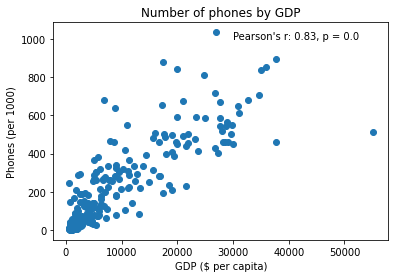

In [25]:
# 1. Simple correlation between phones and GDP
phone_GDP = data[['GDP ($ per capita)','Phones (per 1000)']].dropna()
pearson_phone = stats.pearsonr(phone_GDP['GDP ($ per capita)'],phone_GDP['Phones (per 1000)'])

plt.figure()
plt.scatter(data['GDP ($ per capita)'],data['Phones (per 1000)'])
plt.title('Number of phones by GDP')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Phones (per 1000)')
plt.text(30000, 1000,"Pearson's r: {r}, p = {p}".format(r = round(pearson_phone[0],2), p = round(pearson_phone[1] ,2)));


Unsurprisingly, a strong and significant linear correlation was found between number of phones and country's GDP

2. Correlation between amount of phones and the country's GDP



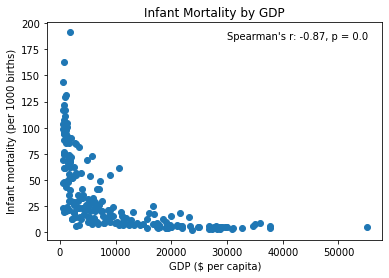

In [24]:
babies_death_GDP = data[['Infant mortality (per 1000 births)','GDP ($ per capita)']].dropna()
spearman_corr_babies = stats.spearmanr(babies_death_GDP)

plt.figure()
plt.scatter(babies_death_GDP['GDP ($ per capita)'],babies_death_GDP['Infant mortality (per 1000 births)']);
plt.title('Infant Mortality by GDP')
plt.ylabel('Infant mortality (per 1000 births)')
plt.xlabel('GDP ($ per capita)')
plt.text(30000, 185,"Spearman's r: {r}, p = {p}".format(r = round(spearman_corr_babies.correlation,2), p = round(spearman_corr_babies.pvalue ,2)));


Strong but non-linear correlation was found between GDP and infant mortality. now, let's break it to some components with multiple regression:

In [73]:
import statsmodels.api as sm
new_data = data.dropna()
X = new_data[['GDP ($ per capita)','Literacy (%)','Agriculture']]
results = sm.OLS(new_data['Infant mortality (per 1000 births)'],X).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Infant mortality (per 1000 births)   R-squared (uncentered):                   0.798
Model:                                            OLS   Adj. R-squared (uncentered):              0.795
Method:                                 Least Squares   F-statistic:                              232.2
Date:                                Fri, 09 Sep 2022   Prob (F-statistic):                    6.23e-61
Time:                                        11:33:26   Log-Likelihood:                         -819.68
No. Observations:                                 179   AIC:                                      1645.
Df Residuals:                                     176   BIC:                                      1655.
Df Model:                                           3                                                  
Covariance Type:                            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
GDP ($ per capita)    -0.0004      0.000     -1.859      0.065      -0.001    2.74e-05
Literacy (%)           0.1372      0.046      2.964      0.003       0.046       0.229
Agriculture          187.1031     11.900     15.723      0.000     163.618     210.588
==============================================================================
Omnibus:                       24.533   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.255
Skew:                           0.821   Prob(JB):                     6.01e-08
Kurtosis:                       4.329   Cond. No.                     8.88e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression analysis shown that after considering literacy rates and agriculture, the GDP predictor is no longer significant - which suggests its correlation with infant mortality is fully mediated.

Analysis of the relationship between costline and country's GDP

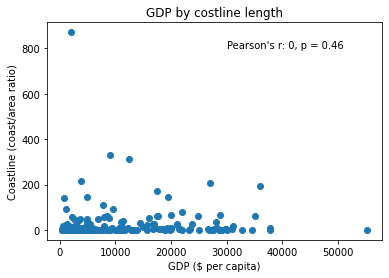

In [29]:
# 1. Simple correlation:

costline_wealth = data[['GDP ($ per capita)','Coastline (coast/area ratio)']].dropna()
pearson_costline = stats.pearsonr(costline_wealth['GDP ($ per capita)'],costline_wealth['Coastline (coast/area ratio)'])

plt.figure()
plt.scatter(costline_wealth['GDP ($ per capita)'],costline_wealth['Coastline (coast/area ratio)']);
plt.title('GDP by costline length')
plt.xlabel('GDP ($ per capita)')
plt.ylabel('Coastline (coast/area ratio)')
plt.text(30000, 800,"Pearson's r: {r}, p = {p}".format(r = round(pearson_costline[0]), p = round(pearson_costline[1] ,2)));


No apparent correlation between costline-length and country's GDP.

But what about the PRESENCE of the costline itself?

In [30]:
# Creating new tabel with GDP by the presence/absance of a costline:
new_costline = costline_wealth.dropna()
for i in range(len(new_costline['Coastline (coast/area ratio)'])):
  if new_costline['Coastline (coast/area ratio)'].iloc[i] == 0:
    new_costline['Coastline (coast/area ratio)'].loc[i] = 0
  else:
    new_costline['Coastline (coast/area ratio)'].loc[i] = 1

# Now, performing t-test for uncoupled samples to test wether the countries with coastline are reacher than the ones without coastline:
coastline = new_costline['GDP ($ per capita)'].loc[new_costline['Coastline (coast/area ratio)']==1]
no_coastline = new_costline['GDP ($ per capita)'].loc[new_costline['Coastline (coast/area ratio)']==0]
coastline_ttest = stats.ttest_ind(coastline,no_coastline)
coastline_STE = [stats.sem(coastline),stats.sem(no_coastline)]
plt.figure()
plt.title('Comparison between average GDP by coastline')
plt.ylabel('GDP ($ per capita)')
plt.bar(['Coastline','No Costline'],[coastline.mean(),no_coastline.mean()],yerr = coastline_STE,capsize=10);
plt.text(1, 10000,"p = {p}".format(p = round(coastline_ttest.pvalue ,2)));


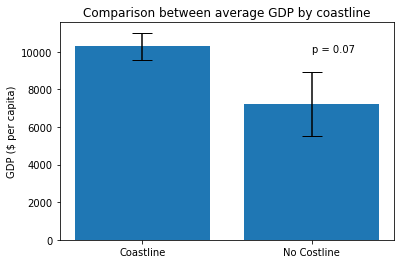

Although it seems like countries with a coastline are wealthier, this is not statistically significant.